# **Laboratorium 5**
Michał Szmuksta, gr. 7, czwartek 10:00

#### **Wstęp**
Celem laboratorium było zapoznanie się z protokołem TIER 3.0 oraz zasadami Tidy Data. Poniższy skrypt miał na celu analizę przetworzonych już danych zawartych w katalogu Analysis Data. Poniżej zaimportowano niezbędne biblioteki. W analizie danych skorzystano z biblioteki pandasql w celu wykorzystania umiejętności nabytych podczas poprzednich laboratoriów.

In [13]:
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt

W poniższej komórce wczytano uporządkowany zbiór danych.

In [14]:
Drinks = pd.read_csv("../Analysis Data/drinks_final.csv")
Drinks
d = sqldf("Select * from Drinks where continent = 'South America' AND beer_servings > wine_servings AND beer_servings > spirit_servings")
d


,country,continent,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Bolivia,South America,167,41,8,3.8
1,Brazil,South America,245,145,16,7.2
2,Colombia,South America,159,76,3,4.2
3,Ecuador,South America,162,74,3,4.2
4,Paraguay,South America,213,117,74,7.3
5,Peru,South America,163,160,21,6.1
6,Trinidad & Tobago,South America,197,156,7,6.4
7,Venezuela,South America,333,100,3,7.7


#### **Analiza danych**
##### **1. Statystyki związane z średnią**
Poniżej przedstawiono statystyki dotyczące średniego spożycie alkoholi na świecie w zależności od kontynentu.

In [15]:
Df = sqldf("SELECT continent, AVG(beer_servings), AVG(spirit_servings), AVG(wine_servings), AVG(total_litres_of_pure_alcohol) FROM Drinks "
           "GROUP BY continent")
Df

,continent,AVG(beer_servings),AVG(spirit_servings),AVG(wine_servings),AVG(total_litres_of_pure_alcohol)
0,Africa,61.471698,16.339623,16.264151,3.007547
1,Asia,37.045455,60.840909,9.068182,2.170455
2,Europe,193.777778,132.555556,142.222222,8.617778
3,North America,143.090909,166.181818,25.318182,5.977273
4,Oceania,89.687500,58.437500,35.625000,3.381250
5,South America,176.769231,117.923077,58.153846,6.315385


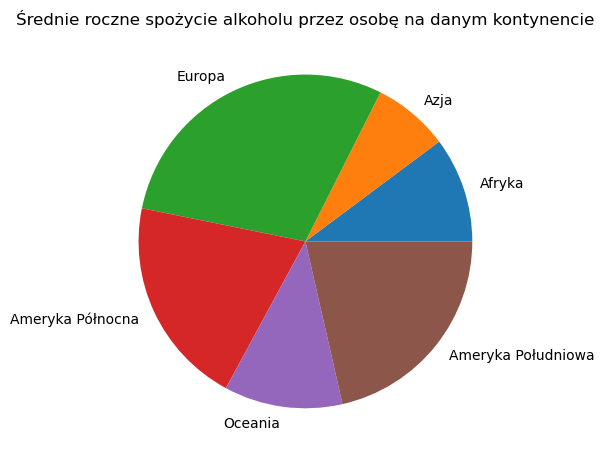

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))
Df.plot.pie(ax=ax, y='AVG(total_litres_of_pure_alcohol)', labels=['Afryka','Azja','Europa','Ameryka Północna','Oceania','Ameryka Południowa'])
ax.set_title('Średnie roczne spożycie alkoholu przez osobę na danym kontynencie')
ax.get_legend().remove()
ax.set_ylabel('')
plt.tight_layout()
plt.show()

Można zauważyć, że średnio najwięcej alkoholu spożywa Europejczyk, za to średnio najmniej alkoholu spożywa Azjata. Osoba żyjąca w Ameryce Północnej spożywa mniej więcej podobną ilość alkoholu co ta żyjąca w Ameryce Południowej. Poniżej przedstawiono bardziej szczegółowe statystyki z podziałem na rodzaj spożywanego alkoholu.

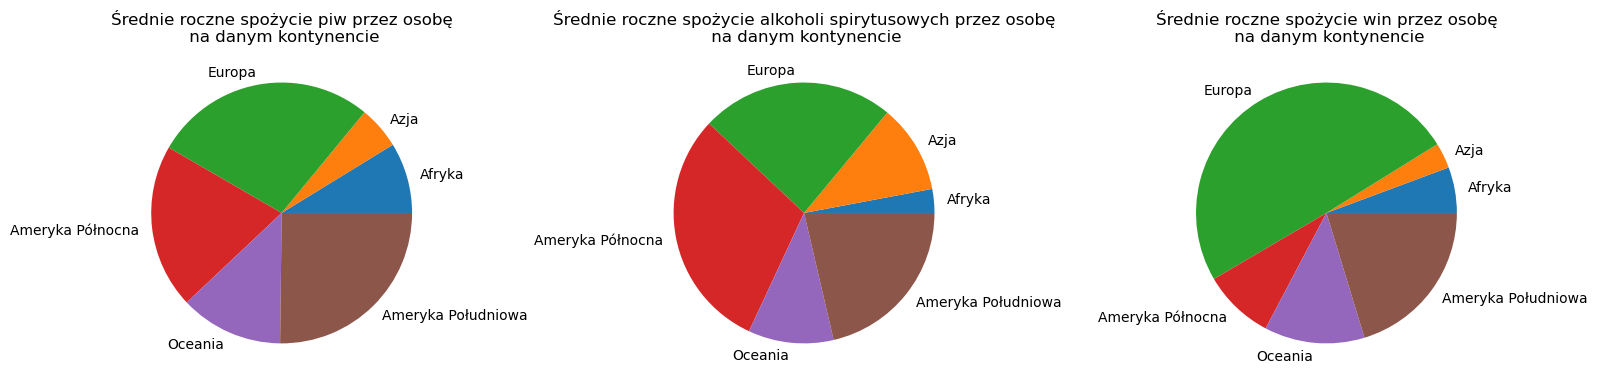

In [17]:
fig, ax = plt.subplots(1,3, figsize=(16, 6))
Df.plot.pie(ax=ax[0], y='AVG(beer_servings)', labels=['Afryka','Azja','Europa','Ameryka Północna','Oceania','Ameryka Południowa'])
ax[0].set_title('Średnie roczne spożycie piw przez osobę\n na danym kontynencie')
ax[0].get_legend().remove()
ax[0].set_ylabel('')
plt.tight_layout()
Df.plot.pie(ax=ax[1], y='AVG(spirit_servings)', labels=['Afryka','Azja','Europa','Ameryka Północna','Oceania','Ameryka Południowa'])
ax[1].set_title('Średnie roczne spożycie alkoholi spirytusowych przez osobę\n na danym kontynencie')
ax[1].get_legend().remove()
ax[1].set_ylabel('')
plt.tight_layout()
Df.plot.pie(ax=ax[2], y='AVG(wine_servings)', labels=['Afryka','Azja','Europa','Ameryka Północna','Oceania','Ameryka Południowa'])
ax[2].set_title('Średnie roczne spożycie win przez osobę\n na danym kontynencie')
ax[2].get_legend().remove()
ax[2].set_ylabel('')
plt.tight_layout()
plt.show()

Co ciekawe można zauważyć, że Europa góruje w aż dwóch typach spożywanego alkoholu, a mianowicie - piwa i wina. Może być to spowodowane rozwiniętą tradycją winiarską oraz browarniczą na starym kontynencie. Przeciętny Europejczyk spożywa tyle samo wina co suma osób żyjących na pozostałych kontynentach. Osoba żyjące w Ameryce Południowej oraz Oceanii średnio wybiera po równo z każdego typu alkoholu, z lekką przewagą piwa. Natomiast osoby żyjące w Ameryce Północnej chętniej sięgają po mocniejsze rodzaje alkoholu, podobnie jak Azjaci.

##### **2. Statystyki związane z wartościami maksymalnymi i minimalnymi**
Poniżej przedstawiono 5 krajów z największym rocznym spożyciem alkoholu na osobę:

In [18]:
Df = sqldf("SELECT country, continent, total_litres_of_pure_alcohol FROM Drinks ORDER BY total_litres_of_pure_alcohol DESC LIMIT 5")
Df

,country,continent,total_litres_of_pure_alcohol
0,Belarus,Europe,14.4
1,Lithuania,Europe,12.9
2,Andorra,Europe,12.4
3,Grenada,North America,11.9
4,Czech Republic,Europe,11.8


Aż trzy z krajów z największym spożyciem alkoholu na osobę znajdują się w Europie.

Poniżej przedstawiono 5 krajów z największym rocznym spożyciem piw na osobę:

In [19]:
Df = sqldf("SELECT country, continent, beer_servings FROM Drinks ORDER BY beer_servings DESC LIMIT 5")
Df

,country,continent,beer_servings
0,Namibia,Africa,376
1,Czech Republic,Europe,361
2,Gabon,Africa,347
3,Germany,Europe,346
4,Lithuania,Europe,343


Jak widać, podobnie jak poprzednio trzy kraje z największym spożyciem piwa znajdują się w Europie. Co ciekawe jednak dwa pozostałe pochodzą z Afryki, a najwięcej piw serwuje się w Namibii.

Poniżej przedstawiono 5 krajów z największym rocznym spożyciem alkoholi spirytusowych na osobę:

In [20]:
Df = sqldf("SELECT country, continent, spirit_servings FROM Drinks ORDER BY spirit_servings DESC LIMIT 5")
Df

,country,continent,spirit_servings
0,Grenada,North America,438
1,Belarus,Europe,373
2,Haiti,North America,326
3,Russian Federation,Asia,326
4,St. Lucia,North America,315


W spożyciu mocnych alkoholi króluje Ameryka Północna na czele z Grenadą, która znacznie wyprzedza Białoruś na drugim miejscu i która również znalazła się w pięciu krajach o całkowitym największym spożyciu alkoholi na świecie.

Poniżej przedstawiono 5 krajów z największym rocznym spożyciem win na osobę:

In [21]:
Df = sqldf("SELECT country, continent, wine_servings FROM Drinks ORDER BY wine_servings DESC LIMIT 5")
Df

,country,continent,wine_servings
0,France,Europe,370
1,Portugal,Europe,339
2,Andorra,Europe,312
3,Switzerland,Europe,280
4,Denmark,Europe,278


Zgodnie z przewidywaniami wszystkie pięć krajów, w których spożywa się najwięcej win, znajduje się w Europie. Przoduje tutaj Francja, która słynie z przemysłu winiarskiego i bogatej tradycji wytwarzania win.

Poniżej przedstawiono kraje z zerowym spożyciem alkoholu:

In [22]:
Df = sqldf("SELECT country, continent FROM Drinks WHERE total_litres_of_pure_alcohol = 0")
Df

,country,continent
0,Afghanistan,Asia
1,Bangladesh,Asia
2,North Korea,Asia
3,Iran,Asia
4,Kuwait,Asia
5,Libya,Africa
6,Maldives,Asia
7,Marshall Islands,Oceania
8,Mauritania,Africa
9,Monaco,Europe


Większość z krajów, w których badanie wskazało brak spożycia alkoholu, charakteryzuje się dużym współczynnikiem ludności muzułmańskiej, dla której alkohol jest zakazanym trunkiem. Kraje znajdujące się wśród listy krajów z zerowym spożyciem często też mają ustruj autorytarny bądź dyktaturę, po czym można wnioskować, że alkohol może być tam gorzej dostępny.

##### **3. Statystyki związane z ilością krajów spełniających założenia**
W poniższym zestawieniu zliczono wszystkie kraje na danym kontynencie, w których serwuje się więcej jednego rodzaju alkoholi niż innych a następnie przedstawiono ich procentową ilość na tle liczby wszystkich krajów na tym kontynencie. Wyniki zaprezentowano w skali procentowej.

In [23]:
Df0 = sqldf("SELECT continent, COUNT(country) AS Every FROM Drinks GROUP BY continent ORDER BY continent")
Df1 = sqldf("SELECT COUNT(country) AS Beer FROM Drinks "
            "WHERE beer_servings > wine_servings AND beer_servings > spirit_servings "
            "GROUP BY continent ORDER BY continent")
Df2 = sqldf("SELECT COUNT(country) AS Spirit FROM Drinks "
            "WHERE spirit_servings > beer_servings AND spirit_servings > wine_servings "
            "GROUP BY continent ORDER BY continent")
Df3 = sqldf("SELECT COUNT(country) AS Wine FROM Drinks "
            "WHERE wine_servings > beer_servings AND wine_servings > spirit_servings "
            "GROUP BY continent ORDER BY continent")
Df = pd.concat([Df0, Df1, Df2, Df3], axis=1)
Df = sqldf("SELECT continent, "
           "Beer*100/Every AS Percentage_of_countries_that_drink_more_beers, "
           "Spirit*100/Every AS Percentage_of_countries_that_drink_more_spirits, "
           "Wine*100/Every AS Percentage_of_countries_that_drink_more_wine "
           "FROM Df ORDER BY continent")
Df

,continent,Percentage_of_countries_that_drink_more_beers,Percentage_of_countries_that_drink_more_spirits,Percentage_of_countries_that_drink_more_wine
0,Africa,79,11,3.773585
1,Asia,27,52,4.545455
2,Europe,46,20,28.888889
3,North America,31,68,13.636364
4,Oceania,68,25,NaN
5,South America,61,15,NaN


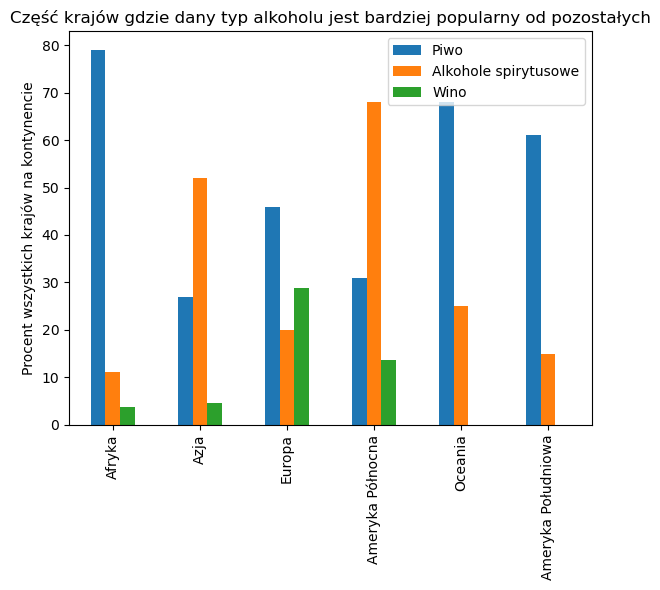

In [24]:
fig, ax = plt.subplots(figsize=(6, 6))
labels=['Afryka','Azja','Europa','Ameryka Północna','Oceania','Ameryka Południowa']
Df.plot.bar(ax=ax, x='continent')
ax.set_title('Część krajów gdzie dany typ alkoholu jest bardziej popularny od pozostałych')
ax.legend(['Piwo', 'Alkohole spirytusowe', 'Wino'])
ax.set_ylabel('Procent wszystkich krajów na kontynencie')
ax.set_xlabel('')
ax.set_xticklabels(labels)
plt.tight_layout()
plt.show()

Jak widać na powyższym wykresie, najwięcej krajów na aż czterech kontynentach preferuje piwo ponad pozostałe typy alkoholi. Jest wśród nich Afryka, gdzie w większości krajów piwo jest najpopularniejsze, Europa, Oceania oraz Ameryka Południowa. Największe zróżnicowanie pod kątem ilości państw preferujących dany typ alkoholu można zauważyć w Europie, gdzie znajduje się duża grupa wielbicieli każdego z trunków. W Azji i Ameryce Południowej większość państw preferuje mocniejsze alkohole. W Oceanii i Ameryce Południowej nie znalazło się ani jedno państwo w którym wino byłoby bardziej popularne od pozostałych alkoholi.

#### **Wnioski**
Ćwicznie pozwoliło za zapoznanie się z Tier Protocol 3.0 oraz zasadami Tidy data, a także pozwoliło stworzyć prostą analizę danego zbioru danych w oparciu o bibliotekę matplotlib oraz pandas.